<IPython.core.display.Javascript object>


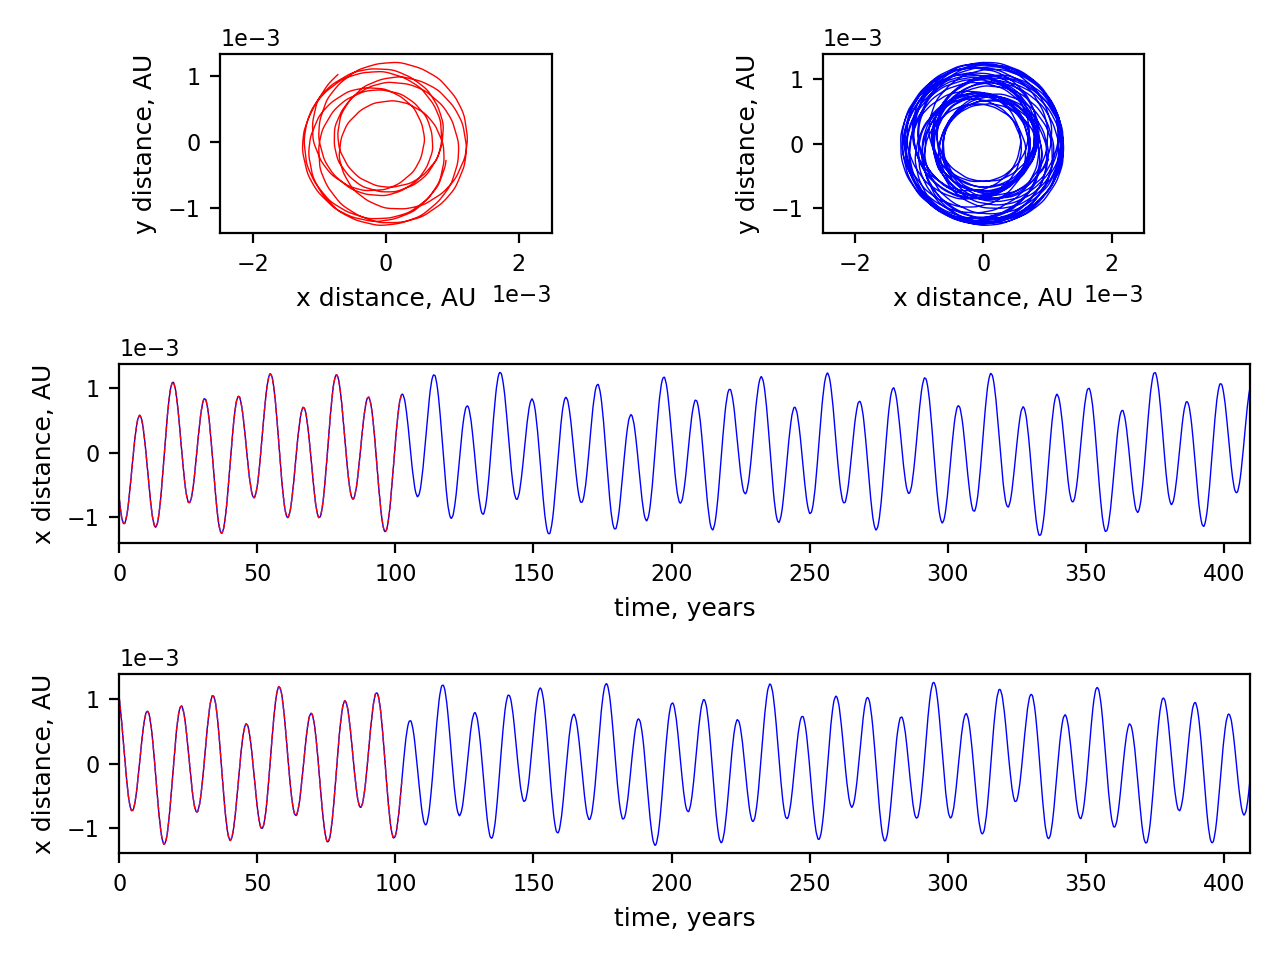

In [5]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
from fftvec import fftvec     
                             

# Python version of lab_fft.m
# lab_fft_cht.m
# Carl Tape, Applied Seismology
#
# Spectral analysis of the motion of the sun due to planetary orbits.
#
# calls fftvec.py, markp.py
#

#---------------------------------
# USER PARAMETERS

# switch between using long time series and short time series
longdata = 1

bprint = 'false' # for saving figures in the notebook

#---------------------------------

# synthetically derived sample points of the motion of our sun due to planet rotations

solarshort = np.loadtxt( './data/solarshort.dat' ) # Make sure that solarshort.dat is in your working directory


ts = solarshort[:,0]
xs = solarshort[:,1]
ys = solarshort[:,2]
#cs = [xs + i*ys]
cs = np.vectorize(complex)(xs, ys)

solarlong = np.loadtxt( './data/solarlong.dat' ) # Make sure that solarlong.dat is in your working directory
tL = solarlong[:,0]
xL = solarlong[:,1]
yL = solarlong[:,2]
#cL = [xL + i*yL]
cL = np.vectorize(complex)(xL, yL)
numt = len(tL)

fig1 = plt.figure()
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=1);ax1.plot(xs, ys,'r', linewidth=0.5);plt.xlim(-.0025,.0025)
plt.xlabel('x distance, AU', fontsize=9);plt.ylabel('y distance, AU', fontsize=9)
plt.ticklabel_format(axis='both',style='sci',scilimits=(0,0));ax1.set_aspect('equal')
ax2 = plt.subplot2grid((3, 2), (0, 1), colspan=1);ax2.plot(xL, yL,'b', linewidth=0.5);plt.xlim(-.0025,.0025)
plt.xlabel('x distance, AU', fontsize=9);plt.ylabel('y distance, AU', fontsize=9)
plt.ticklabel_format(axis='both',style='sci',scilimits=(0,0));ax2.set_aspect('equal')
ax3 = plt.subplot2grid((3, 2), (1, 0), colspan=2);ax3.plot(tL, xL,'b', linewidth=0.5);ax3.plot(ts, xs,'r--', linewidth=0.5)
plt.xlim(0,max(tL));plt.xlabel('time, years', fontsize=9);plt.ylabel('x distance, AU', fontsize=9)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax4 = plt.subplot2grid((3, 2), (2, 0), colspan=2);ax4.plot(tL, yL,'b', linewidth=0.5);ax4.plot(ts, ys,'r--', linewidth=0.5)
plt.xlim(0,max(tL));plt.xlabel('time, years', fontsize=9);plt.ylabel('x distance, AU', fontsize=9)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

if bprint == 'true':
    fig1.savefig('fft_solar_data') # saves to current notebook directory
plt.tight_layout()


In [6]:
if longdata==0:
    t = ts; c = cs; ftag = 'short'
else:
    t = tL; c = cL; ftag = 'long'
n = len(t)

# sidereal orbit periods -- IN YEARS
# http://ssd.jpl.nasa.gov/?planet_phys_par
periods = np.array([0.2408467,0.61519726,1.0000174,1.8808476,11.862615,29.447498,84.016846,164.79132,247.92065])
nump = len(periods)
freqs=[]
omegs=[]
print(1/periods[0])
for i in range(nump):
    freq=(1/periods[i])
    freqs.append(freq)
    omegs.append(2*math.pi*float(freq))
stvec = ['Mer','Ven','Ear','Mar','Jup','Sat','Ura','Nep','Plu']
print('ALL TIME UNITS IN YEARS')
print('    period   frequency  angular frequency')
for ii in range(nump):
    print(stvec[ii] ,round(periods[ii],6) ,round(freqs[ii],6) ,round(omegs[ii],6))

#          period     frequency  angular frequency
# Mer       0.240847    4.152019   26.087903
# Ven       0.615197    1.625495   10.213286
# Ear       1.000017    0.999983    6.283076
# Mar       1.880848    0.531675    3.340614
# Jup      11.862615    0.084298    0.529663
# Sat      29.447498    0.033959    0.213369
# Ura      84.016846    0.011902    0.074785
# Nep     164.791320    0.006068    0.038128
# Plu     247.920650    0.004034    0.025344

#==========================================================================
# FFT ANALYSIS HERE



4.152018690727338
ALL TIME UNITS IN YEARS
    period   frequency  angular frequency
Mer 0.240847 4.152019 26.087903
Ven 0.615197 1.625495 10.213286
Ear 1.000017 0.999983 6.283076
Mar 1.880848 0.531675 3.340614
Jup 11.862615 0.084298 0.529663
Sat 29.447498 0.033959 0.213369
Ura 84.016846 0.011902 0.074785
Nep 164.79132 0.006068 0.038128
Plu 247.92065 0.004034 0.025344


<IPython.core.display.Javascript object>


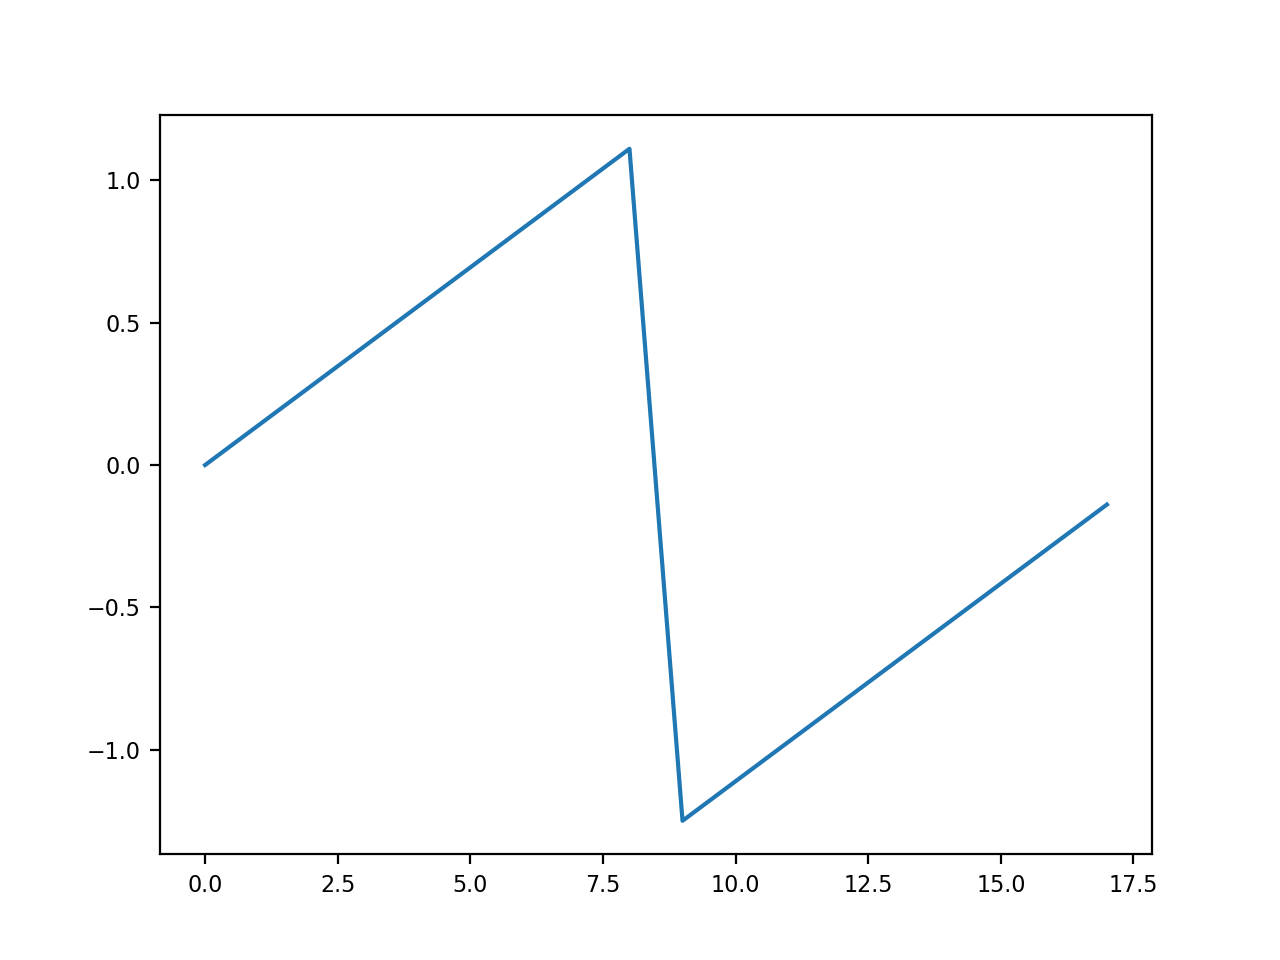

<IPython.core.display.Javascript object>


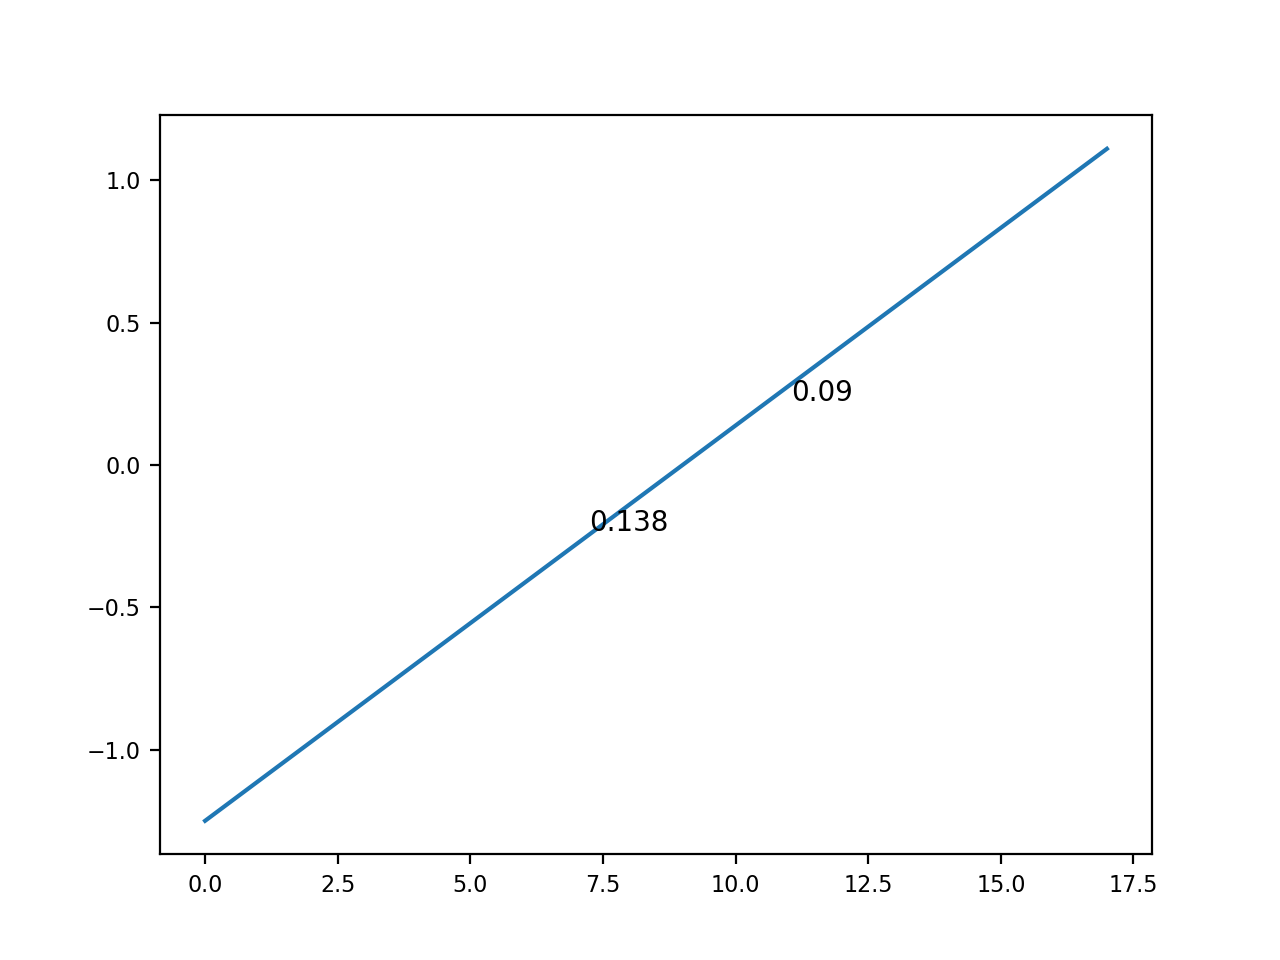

In [7]:
# example using fftvec and markp

def markp(event):
    print('x=%f, y=%f' % (event.xdata, event.ydata))
    prd=round(1/event.xdata, 3)
    axe=event.inaxes
    axe.text(event.xdata, event.ydata, s = str(prd))
    plt.draw()

t = np.arange(2,9.0,0.4); n=len(t); 
f = fftvec(t); 
ix = 4; 
dt = t[1]-t[0] 
df = 1/(2*dt)/(n/2) 
fig=plt.figure();plt.plot(f,'-'); 
fig2=plt.figure(); plt.plot(np.fft.fftshift(f),'-');
cid = fig2.canvas.mpl_connect('button_press_event', markp)